datasets
* source stratified (Europe): https://drive.google.com/file/d/12IJP9VdZ930sSzVTidBsqZwDkG0cdfRI/view?usp=drive_link
* target stratified (South Asia): https://drive.google.com/file/d/1Jm8zFdfCjKFMjGAhB8a6dshWTuWdMzZi/view?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
s = pd.read_csv('source_stratified.csv')
t = pd.read_csv('target_stratified.csv')

In [ ]:
c = ['Unnamed: 0']
s.drop(c, axis=1, inplace=True)
t.drop(c, axis=1, inplace=True)

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30815 entries, 0 to 30814
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           30815 non-null  float64
 1   eaf            30815 non-null  float64
 2   maf            30815 non-null  float64
 3   position       30815 non-null  int64  
 4   stdErr         30815 non-null  float64
 5   zScore         30815 non-null  float64
 6   alt_C          30815 non-null  int64  
 7   alt_G          30815 non-null  int64  
 8   alt_T          30815 non-null  int64  
 9   minorAllele_C  30815 non-null  int64  
 10  minorAllele_G  30815 non-null  int64  
 11  minorAllele_T  30815 non-null  int64  
 12  logP           30815 non-null  float64
 13  prs_component  30815 non-null  float64
 14  t2d_predicted  30814 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 3.5 MB


In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           9463 non-null   float64
 1   eaf            9463 non-null   float64
 2   maf            9463 non-null   float64
 3   position       9463 non-null   int64  
 4   stdErr         9463 non-null   float64
 5   zScore         9463 non-null   float64
 6   alt_C          9463 non-null   bool   
 7   alt_G          9463 non-null   bool   
 8   alt_T          9463 non-null   bool   
 9   minorAllele_C  9463 non-null   bool   
 10  minorAllele_G  9463 non-null   bool   
 11  minorAllele_T  9463 non-null   bool   
 12  logP           9463 non-null   float64
 13  prs_component  9463 non-null   float64
 14  t2d_predicted  9463 non-null   int64  
dtypes: bool(6), float64(7), int64(2)
memory usage: 720.9 KB


##source training

arranging input features and target, train-test-split

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


df = s.dropna(subset=['t2d_predicted'])


X = df.drop(columns=['t2d_predicted'])
y = df['t2d_predicted']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


neural network structure

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


fine tuned Adam optimizer

In [ ]:
from tensorflow.keras.optimizers import Adam


custom_optimizer = Adam(
    learning_rate=0.000005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)


early stopping to avoid overfitting

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


NN training

In [ ]:
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop]  # Add the callback here
)



Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.4926 - loss: 0.7047 - val_accuracy: 0.4561 - val_loss: 0.6942
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4961 - loss: 0.7030 - val_accuracy: 0.4621 - val_loss: 0.6932
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5020 - loss: 0.7052 - val_accuracy: 0.4758 - val_loss: 0.6924
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4944 - loss: 0.7033 - val_accuracy: 0.4978 - val_loss: 0.6915
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5007 - loss: 0.7018 - val_accuracy: 0.5259 - val_loss: 0.6908
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4961 - loss: 0.7004 - val_accuracy: 0.5586 - val_loss: 0.6903
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5049 - loss: 0.7011 - val_accuracy: 0.5873 - val_loss: 0.6896
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4982 - loss: 0.7002 - val_accuracy: 

Model performance

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9088 - loss: 0.5973

Test Accuracy: 0.9087


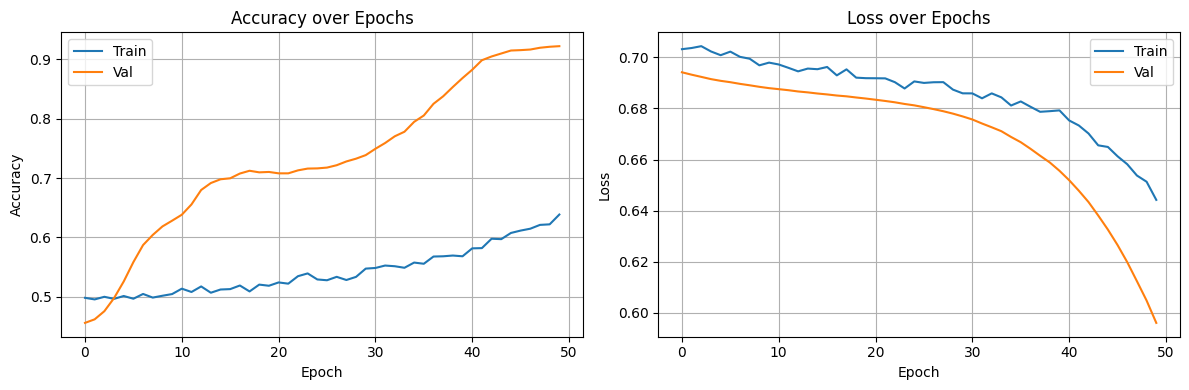

In [ ]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Test Loss: 0.5957
Test Accuracy (from evaluate): 0.9087
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


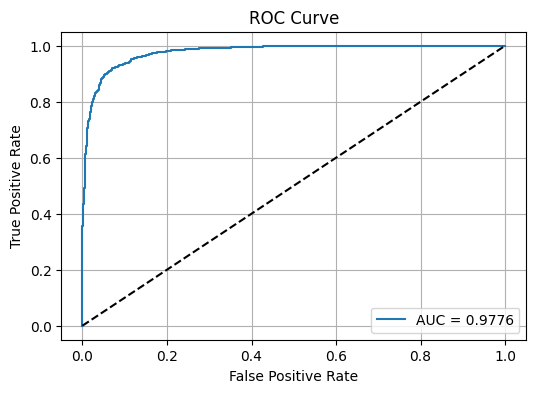

Test Precision: 0.9595
Test Recall: 0.8673
Test F1-Score: 0.9110
Test AUC-ROC: 0.9776


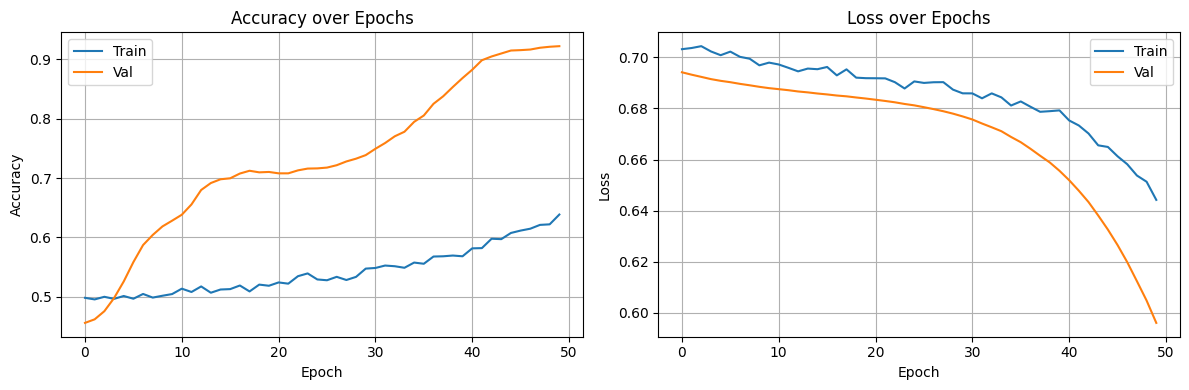

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy (from evaluate): {accuracy:.4f}")


y_pred_probs = model.predict(X_test)


if y_pred_probs.shape[1] == 1:
    y_pred = (y_pred_probs > 0.5).astype(int)
    y_true = y_test.astype(int)
    average_param = 'binary'
    roc_auc = roc_auc_score(y_true, y_pred_probs)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


elif y_pred_probs.shape[1] > 1:
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)
    average_param = 'weighted'

    print("\nAUC-ROC is typically calculated for binary classification.")
    roc_auc = None
else:
    print("Unexpected output shape from model.predict()")
    exit()


precision = precision_score(y_true, y_pred, average=average_param)
recall = recall_score(y_true, y_pred, average=average_param)
f1 = f1_score(y_true, y_pred, average=average_param)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")

if roc_auc is not None:
    print(f"Test AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

saving the model

In [ ]:

model.save('/content/my_model.h5')

In [ ]:
from google.colab import files


files.download('/content/my_model.h5')


!zip -r my_model.zip /content/my_model
files.download('/content/my_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

	zip warning: name not matched: /content/my_model

zip error: Nothing to do! (try: zip -r my_model.zip . -i /content/my_model)


FileNotFoundError: Cannot find file: /content/my_model.zip

confusion matrix

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


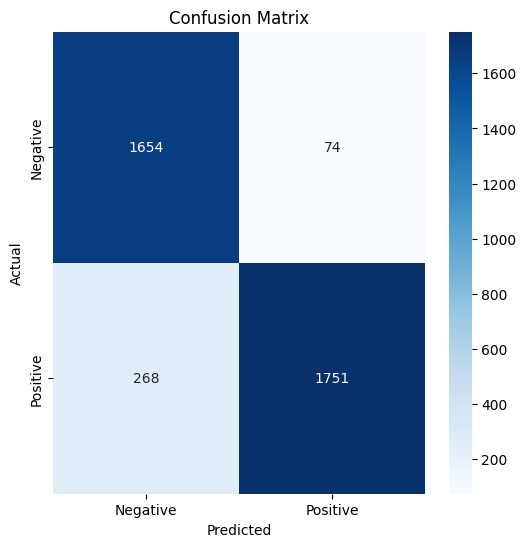

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##genetic drift

##Wright Fischer Model to account for ancestry differences
* generation_t = binomial_dist(2 * population_size, drifted) / (2 * population_size)

In [ ]:
import numpy as np

def apply_wright_fisher_drift(allele_freqs, generations=10, population_size=1000):
    drifted = allele_freqs.copy()
    for _ in range(generations):
        drifted = np.random.binomial(2 * population_size, drifted) / (2 * population_size)
    return drifted

t['eaf_drifted'] = apply_wright_fisher_drift(t['eaf'].values)
t['maf_drifted'] = apply_wright_fisher_drift(t['maf'].values)


In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           9463 non-null   float64
 1   eaf            9463 non-null   float64
 2   maf            9463 non-null   float64
 3   position       9463 non-null   int64  
 4   stdErr         9463 non-null   float64
 5   zScore         9463 non-null   float64
 6   alt_C          9463 non-null   bool   
 7   alt_G          9463 non-null   bool   
 8   alt_T          9463 non-null   bool   
 9   minorAllele_C  9463 non-null   bool   
 10  minorAllele_G  9463 non-null   bool   
 11  minorAllele_T  9463 non-null   bool   
 12  logP           9463 non-null   float64
 13  prs_component  9463 non-null   float64
 14  t2d_predicted  9463 non-null   int64  
 15  eaf_drifted    9463 non-null   float64
 16  maf_drifted    9463 non-null   float64
dtypes: bool(6), float64(9), int64(2)
memory usage: 868.8

In [ ]:
t.head(50)

,beta,eaf,maf,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T,logP,prs_component,t2d_predicted,eaf_drifted,maf_drifted
0,0.090776,0.3505,0.3190,53809123,0.011315,8.022463,False,False,True,False,False,True,14.984448,0.030426,1,0.3505,0.3190
1,0.091561,0.3485,0.3415,53806453,0.011452,7.995198,False,True,False,False,True,False,14.888179,0.030198,1,0.3485,0.3415
2,0.091423,0.3930,0.3100,53802494,0.011453,7.982772,False,False,True,False,False,True,14.844412,0.030223,1,0.3930,0.3100
3,0.091423,0.3045,0.3795,53803223,0.011453,7.982772,False,False,False,False,False,False,14.844412,0.030223,1,0.3045,0.3795
4,0.091423,0.3450,0.3610,53803574,0.011453,7.982772,False,False,False,False,False,False,14.844412,0.030223,1,0.3450,0.3610
5,0.090201,0.3705,0.3330,53800954,0.011318,7.969888,True,False,False,True,False,False,14.799099,0.030181,1,0.3705,0.3330
6,0.091108,0.3335,0.2845,53822502,0.011756,7.749805,False,True,False,False,True,False,14.036053,0.028556,1,0.3335,0.2845
7,0.089435,0.3365,0.3305,53810686,0.011713,7.635280,True,False,False,True,False,False,13.647181,0.028370,1,0.3365,0.3305
8,0.088813,0.2690,0.2775,53818834,0.011636,7.632464,False,True,False,False,True,False,13.637689,0.027880,1,0.2690,0.2775
9,0.088773,0.2800,0.2990,53813450,0.011634,7.630402,False,False,True,False,False,True,13.630740,0.027966,1,0.2800,0.2990


replacing target frequencies with drifted frequencies

In [ ]:
t[['eaf', 'maf']] = t[['eaf_drifted', 'maf_drifted']]

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           9463 non-null   float64
 1   eaf            9463 non-null   float64
 2   maf            9463 non-null   float64
 3   position       9463 non-null   int64  
 4   stdErr         9463 non-null   float64
 5   zScore         9463 non-null   float64
 6   alt_C          9463 non-null   bool   
 7   alt_G          9463 non-null   bool   
 8   alt_T          9463 non-null   bool   
 9   minorAllele_C  9463 non-null   bool   
 10  minorAllele_G  9463 non-null   bool   
 11  minorAllele_T  9463 non-null   bool   
 12  logP           9463 non-null   float64
 13  prs_component  9463 non-null   float64
 14  t2d_predicted  9463 non-null   int64  
 15  eaf_drifted    9463 non-null   float64
 16  maf_drifted    9463 non-null   float64
dtypes: bool(6), float64(9), int64(2)
memory usage: 868.8

In [ ]:
t.head()

,beta,eaf,maf,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T,logP,prs_component,t2d_predicted,eaf_drifted,maf_drifted
0,0.090776,0.3505,0.3190,53809123,0.011315,8.022463,False,False,True,False,False,True,14.984448,0.030426,1,0.3505,0.3190
1,0.091561,0.3485,0.3415,53806453,0.011452,7.995198,False,True,False,False,True,False,14.888179,0.030198,1,0.3485,0.3415
2,0.091423,0.3930,0.3100,53802494,0.011453,7.982772,False,False,True,False,False,True,14.844412,0.030223,1,0.3930,0.3100
3,0.091423,0.3045,0.3795,53803223,0.011453,7.982772,False,False,False,False,False,False,14.844412,0.030223,1,0.3045,0.3795
4,0.091423,0.3450,0.3610,53803574,0.011453,7.982772,False,False,False,False,False,False,14.844412,0.030223,1,0.3450,0.3610


In [ ]:
t.drop(['eaf_drifted', 'maf_drifted'], axis=1, inplace=True)

In [ ]:
t.rename(columns={'eaf': 'eaf_drifted', 'maf': 'maf_drifted'}, inplace=True)

In [ ]:
t.rename(columns={'eaf_drifted': 'eaf' ,'maf_drifted': 'maf'}, inplace=True)

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           9463 non-null   float64
 1   eaf            9463 non-null   float64
 2   maf            9463 non-null   float64
 3   position       9463 non-null   int64  
 4   stdErr         9463 non-null   float64
 5   zScore         9463 non-null   float64
 6   alt_C          9463 non-null   bool   
 7   alt_G          9463 non-null   bool   
 8   alt_T          9463 non-null   bool   
 9   minorAllele_C  9463 non-null   bool   
 10  minorAllele_G  9463 non-null   bool   
 11  minorAllele_T  9463 non-null   bool   
 12  logP           9463 non-null   float64
 13  prs_component  9463 non-null   float64
 14  t2d_predicted  9463 non-null   int64  
dtypes: bool(6), float64(7), int64(2)
memory usage: 720.9 KB


##target training

eaf, maf and prs distributions

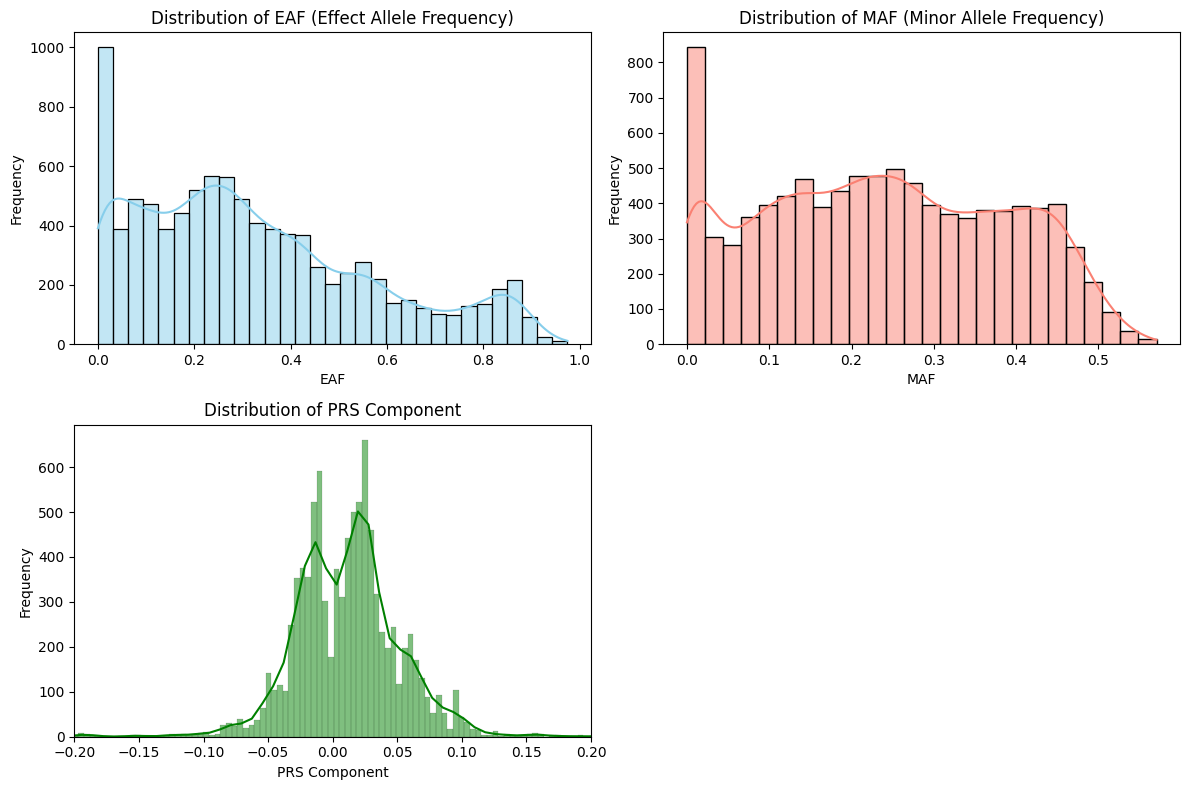

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(t['eaf'], kde=True, color='skyblue')
plt.title('Distribution of EAF (Effect Allele Frequency)')
plt.xlabel('EAF')
plt.ylabel('Frequency')


plt.subplot(2, 2, 2)
sns.histplot(t['maf'], kde=True, color='salmon')
plt.title('Distribution of MAF (Minor Allele Frequency)')
plt.xlabel('MAF')
plt.ylabel('Frequency')


plt.subplot(2, 2, 3)
sns.histplot(t['prs_component'], kde=True, color='green')
plt.title('Distribution of PRS Component')
plt.xlabel('PRS Component')
plt.ylabel('Frequency')
plt.xlim(-0.2, 0.2)

plt.tight_layout()
plt.show()


scaling and transforming on the basis of source scaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target_df = t.dropna(subset=['t2d_predicted'])


X_target = target_df.drop(columns=['t2d_predicted'])
y_target = target_df['t2d_predicted']


X_target_train, X_target_val, y_target_train, y_target_val = train_test_split(
    X_target, y_target, test_size=0.2, random_state=42
)

# Apply source scaler to target sets
X_target_train = scaler.transform(X_target_train)
X_target_val = scaler.transform(X_target_val)


fine-tuned Nadam Optimizer

In [ ]:
from tensorflow.keras.optimizers import Nadam

optimizer1 = Nadam(learning_rate=0.0000001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)




target training using pre-trained source model except the last layer

In [ ]:
from tensorflow.keras import layers, models, callbacks, optimizers


for layer in model.layers[:-2]:
    layer.trainable = False


model.compile(optimizer=optimizer1, loss='binary_crossentropy', metrics=['accuracy'])

lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)


history_ft = model.fit(X_target_train, y_target_train,
                       epochs=50,
                       validation_data=(X_target_val, y_target_val),
                       batch_size=16,
                       callbacks=[lr_scheduler]
                       )


Epoch 1/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.6400 - loss: 0.6477 - val_accuracy: 0.9054 - val_loss: 0.6146 - learning_rate: 1.0000e-07
Epoch 2/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6399 - loss: 0.6501 - val_accuracy: 0.9054 - val_loss: 0.6146 - learning_rate: 1.0000e-07
Epoch 3/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6441 - loss: 0.6516 - val_accuracy: 0.9054 - val_loss: 0.6146 - learning_rate: 1.0000e-07
Epoch 4/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6444 - loss: 0.6493 - val_accuracy: 0.9054 - val_loss: 0.6146 - learning_rate: 5.0000e-08
Epoch 5/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6464 - loss: 0.6511 - val_accuracy: 0.9054 - val_loss: 0.6146 - learning_rate: 5.0000e-08
Epoch 6/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6342 - loss: 0.6525 - val_accuracy: 0.9054 - val_loss: 0.6146 - learning_rate: 2.5000e-08
Epoch 7/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy

evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


y_pred_probs = model.predict(X_target_val)
y_pred = (y_pred_probs > 0.5).astype(int)


y_pred = y_pred.ravel()
y_target_val_flat = y_target_val.values.ravel()


accuracy = accuracy_score(y_target_val_flat, y_pred)
precision = precision_score(y_target_val_flat, y_pred)
recall = recall_score(y_target_val_flat, y_pred)
f1 = f1_score(y_target_val_flat, y_pred)
auc = roc_auc_score(y_target_val_flat, y_pred_probs)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy:  0.9054
Precision: 0.8481
Recall:    0.9928
F1-score:  0.9147
AUC-ROC:   0.9710


target confusion matrix

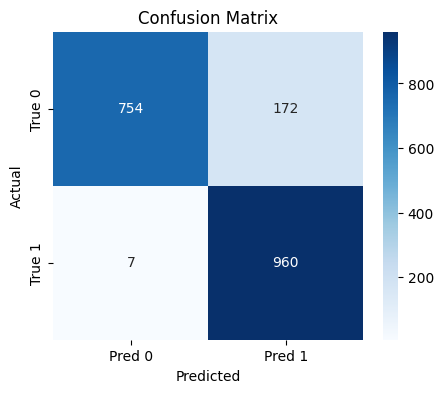

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_target_val_flat, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


roc curve

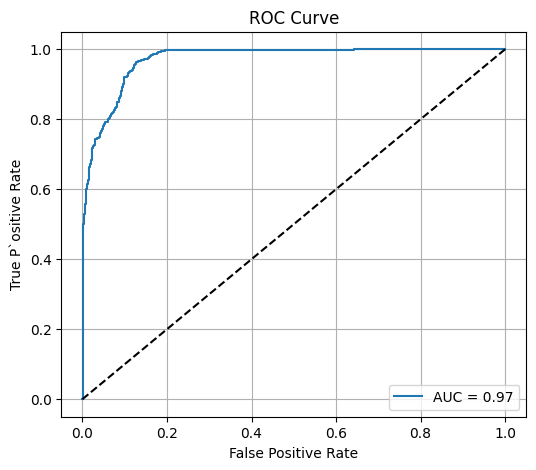

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_target_val_flat, y_pred_probs)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True P`ositive Rate")
plt.legend()
plt.grid()
plt.show()


##demo implementation

In [ ]:
import pandas as pd
import numpy as np
from io import StringIO

demo_data = """beta,eaf,maf,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T,logP,prs_component
0.12,0.45,0.55,123456,0.05,2.3,0,1,0,1,0,0,3.2,0.75
-0.09,0.60,0.40,789101,0.07,-1.8,1,0,0,0,1,0,1.5,0.42
"""

df_input = pd.read_csv(StringIO(demo_data))

feature_order = [
    'beta', 'eaf', 'maf', 'position', 'stdErr', 'zScore',
    'alt_C', 'alt_G', 'alt_T', 'minorAllele_C', 'minorAllele_G', 'minorAllele_T',
    'logP', 'prs_component'
]

X_input = df_input[feature_order]
X_scaled = scaler.transform(X_input)
predictions = model.predict(X_scaled).flatten()
df_input["T2D_Risk_Prob"] = predictions
df_input["T2D_Risk_Level"] = np.where(predictions > 0.5, "High Risk", "Low Risk")
print(df_input[["T2D_Risk_Prob", "T2D_Risk_Level"]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
   T2D_Risk_Prob T2D_Risk_Level
0       0.567535      High Risk
1       0.553878      High Risk
